### TTest-Noise

In [50]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import scipy
from tqdm import tqdm, trange
#from tqdm import tnrange,tqdm_notebook
import matplotlib.pyplot as plt
from scipy.stats import t
import matplotlib.pyplot as plt
#import gmpy2
#from gmpy2 import mpz,mpq,mpfr,mpc
import os
import scipy.io as sio
import matplotlib.pyplot as plt
from tqdm import tnrange,tqdm_notebook

In [51]:
d_len = 50
d_file_len = 50
num_files = 20000

In [52]:
def prodTraces(path):
    myArray = []
    #myArray = np.array(myArray)
    index = 0
    index2 = 1
    df_data = pd.read_csv(path)
    df_data = df_data.drop(['label'],axis=1)
    df_data = df_data * df_data
    
    myArray = np.array(df_data[0:10000])
    myArray = myArray.sum(axis=0)
    myArray = np.array([myArray])
      
    return(myArray)

In [53]:
def sumTraces(path):
    myArray = []
    myArray = np.array(myArray)
    index = 0
    df_data = pd.read_csv(path)
    df_data = df_data.drop(['label'],axis=1)
        
    myArray = np.array(df_data[0:10000])
    myArray = myArray.sum(axis=0)
    myArray = np.array([myArray])      
    return(myArray)

### Calculate sum and prod

In [54]:
# calulate sum for dataset 1
df_ds1_sum = sumTraces('../../TS1_A.csv')
df_ds1_sum = np.array(df_ds1_sum)

In [55]:
df_ds1_sum

array([[1285834.66556608, 1267108.2936668 , 1281573.64845399,
        1284404.08054171, 1268871.66568807, 1263620.47355069,
        1276296.12136917, 1275944.57686612, 1279044.95110903,
        1268663.36929496, 1282400.42001335, 1271242.7008714 ,
        1253114.60827209, 1276973.09495537, 1283846.11287406,
        1276883.17312493, 1278187.81406925, 1265899.32779842,
        1287107.49722625, 1274988.93609502, 1273366.10939833,
        1285027.21040623, 1280218.10338461, 1276751.62621558,
        1269790.02566651, 1278916.12367474, 1272616.93588173,
        1279210.06090828, 1271684.85758587, 1277106.46742247,
        1259728.56317149, 1283526.57588117, 1279900.16497338,
        1264877.8914193 , 1280115.79777882, 1276654.48720355,
        1283592.58910315, 1293653.71408859, 1272167.9921724 ,
        1275062.65109527, 1271417.07275548, 1270299.23182588,
        1273384.96971976, 1265177.03152125, 1266921.09733925,
        1268426.78748061, 1279716.15923334, 1267275.8001624 ,
        

In [56]:
# calulate sum for dataset 2
df_ds2_sum = sumTraces('../../TS1_B.csv')
df_ds2_sum = np.array(df_ds2_sum)

In [57]:
# calulate prod for dataset 1
df_ds1_prod = prodTraces("../../TS1_A.csv")
df_ds1_prod = np.array(df_ds1_prod)

In [58]:
len(df_ds1_prod[0])

50

In [59]:
# calulate sum for dataset 2
df_ds2_prod = prodTraces('../../TS1_B.csv')
df_ds2_prod = np.array(df_ds2_prod)

In [60]:
rl_num = 10000

In [61]:
df_ds1_mean = df_ds1_sum / rl_num
df_ds1_mean=df_ds1_mean[0]

In [62]:
df_ds2_mean = df_ds2_sum / rl_num
df_ds2_mean = df_ds2_mean[0]

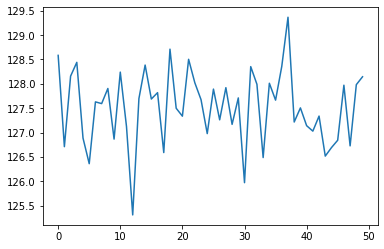

In [63]:
plt.plot(df_ds1_mean)

In [64]:
#plt.plot(df_ds1_mean[30000:500000])

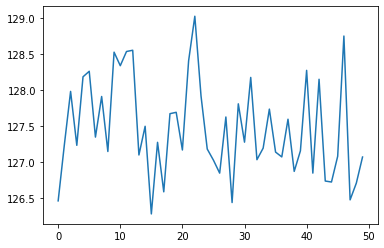

In [65]:
plt.plot(df_ds2_mean)

In [66]:
df_ds1_var = 1/rl_num*(((df_ds1_sum ** 2) / rl_num) + df_ds1_prod)

In [67]:
df_ds2_var = 1/rl_num*(((df_ds2_sum ** 2) / rl_num) + df_ds2_prod)

In [68]:
df_ds1_std = np.sqrt(df_ds1_var)

In [69]:
df_ds1_std = df_ds1_std[0]

In [70]:
df_ds2_std = np.sqrt(df_ds2_var)
df_ds2_std = df_ds2_std[0]

In [71]:
import matplotlib.pyplot as plt

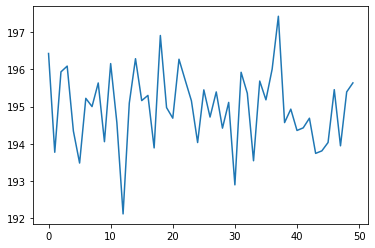

In [72]:
plt.plot(df_ds1_std)

### T-Test 

In [73]:
def tMean(data1,data2):
    return(data1 - data2)

In [74]:
def tSN(std,n):
    return(std**2/n)

In [75]:
def ttestCalc(mean1,mean2,std1,std2,data_len):
    tv = (tMean(mean1,mean2)) / (np.sqrt(tSN(std1,data_len) + tSN(std2,data_len)))
    return(np.abs(tv))

In [76]:
def tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,tLeng):
    arr_collect_All=[]
    #for j in tnrange(0,(int(tLeng/2))):
    for j in tnrange(0,tLeng):    
        arr_collect=[]
        arr_collect_All.append(ttestCalc(df_ds1_mean[j],df_ds2_mean[j],df_ds1_std[j],df_ds2_std[j],rl_num))
            #arr_collect.append(ttestCalc(df_ds1_mean[j],df_ds2_mean[i],df_ds1_std[j],df_ds2_std[i],data1,data2))
        #arr_collect_All.append(np.amax(arr_collect))
    return(arr_collect_All)

In [77]:
len(df_ds2_std)

50

In [78]:
myTest = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,len(df_ds2_std))

C:\Users\Johannes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


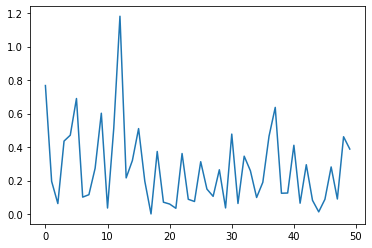

In [79]:
plt.plot(myTest)

In [80]:
myTest = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,len(df_ds2_std))

C:\Users\Johannes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


In [81]:
#myTest = tTest(df_ds1_mean[30000:500000],df_ds2_mean[30000:500000],df_ds1_std[30000:500000],df_ds2_std[30000:500000],len(df_ds2_std[30000:500000]))

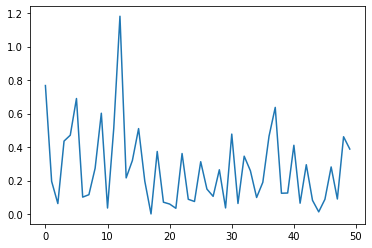

In [82]:
plt.plot(myTest)

### Degree of freedom

In [83]:
def vS2(data_len,df_ds1_std,df_ds2_std):    
    s22 = (tSN(df_ds1_std,data_len) + tSN(df_ds2_std,data_len))**2
    return(s22)

In [84]:
def df(df_ds1_std,df_ds2_std):
    
    data_len = rl_num
    s22 = vS2(data_len,df_ds1_std,df_ds2_std)
    
    term1 = (df_ds1_std**2 / (data_len))**2 / (data_len - 1)
    term2 = (df_ds2_std**2 / (data_len))**2 / (data_len - 1)

    v = s22 / (term1 + term2)
    
    return(v)

### CDF

In [85]:
def cdf(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std):
    cdf_array = []
    
    colLen = 50

    tV = tTest(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std,colLen)
    #print(tV)
    v = df(df_ds1_std,df_ds2_std)
    
    
    #print("t-value",tV[24])
    #print("v-value",v[24])
    
    for i in range(0,colLen):
        cdf_array.append(t.cdf(-1 *(tV[i]),v[i]))
        
    return(cdf_array)

### T-Test TS1

In [86]:
#df_CDF = cdf(df_ds1_mean[30000:500000],df_ds2_mean[30000:500000],df_ds1_std[30000:500000],df_ds2_std[30000:500000])

In [87]:
df_CDF = cdf(df_ds1_mean,df_ds2_mean,df_ds1_std,df_ds2_std)

C:\Users\Johannes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


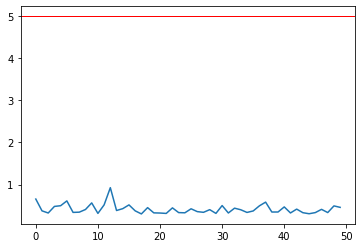

In [88]:
plt.plot(-np.log10(df_CDF),'-')
plt.axhline(y=5.0, xmin=0, xmax=1, color='r', linestyle='-', lw=1)
plt.show()

### Analyzing

In [89]:
meanData = df_ds1_mean - df_ds2_mean

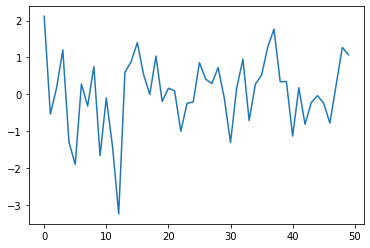

In [90]:
plt.plot(meanData)